In [2]:
import json, requests
import nltk
import re
from nltk.corpus import sentiwordnet as swn
import time
import timeit
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import pandas as pd
import numpy as np
import urllib.request, urllib.parse, urllib.error
import datetime

import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import zscore

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

from transformers import pipeline

import pyspark
import sys
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from operator import add
from pprint import pprint
import random
from random import sample 
from pyspark import SparkConf, SparkContext
from datetime import datetime
from operator import itemgetter
sc = pyspark.SparkContext.getOrCreate()



# Column (Y Axis) vs Index (X Axis) Index equals row

In [3]:
bitcoin = pd.read_csv("C:\\Users\\mgall\\OneDrive\\Desktop\\bitcoin.csv")

In [4]:
# Drop URL
bitcoin = bitcoin.drop('url', 1)

In [5]:
# Drop URL Images
bitcoin = bitcoin.drop('urlToImage', 1)

In [6]:
# Drop Source
bitcoin = bitcoin.drop('source', 1)

In [7]:
# Drop Author
bitcoin = bitcoin.drop('author', 1)

In [8]:
bitcoin = bitcoin.drop('description', 1)

In [9]:
bitcoin = bitcoin.drop('content', 1)

In [10]:
bitcoin = bitcoin.rename(columns={'title': 'Sentence'})

In [11]:
bitcoin = bitcoin.rename(columns={'publishedAt': 'Time'})

In [12]:
txt = bitcoin

In [13]:
txt

,Sentence,Time
0,Travelex Reportedly Paid Ransomware Hackers 28...,2020-04-09T21:40:00Z
1,WSJ: Travelex paid ransomware ring $2.3 million,2020-04-09T23:39:27Z
2,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,2020-03-31T10:07:07Z
3,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,2020-04-28T10:16:38Z
4,Satoshi Nakaboto: ‘Exchanges see 10% of Bitcoi...,2020-04-15T09:03:30Z
...,...,...
95,Bitcoin’s Huge Surge This Week Could Be The Ti...,2020-04-04T10:00:55Z
96,Coinbase Co-Founder Invests In Project To Brid...,2020-04-03T22:18:09Z
97,Visa Is About To Make Bitcoin Spending Easier ...,2020-04-13T07:57:31Z
98,Just One Major Cryptocurrency Is Outperforming...,2020-04-03T06:39:25Z


In [14]:
#### SORT

txt = txt.sort_values(by='Time', ascending=True)
txt

,Sentence,Time
44,The Official Pablo Escobar Phone Saga Is Bonkers,2020-03-29T07:00:00Z
14,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,2020-03-30T10:25:24Z
46,Crypto Traders See Bitcoin (But Not Ethereum) ...,2020-03-30T11:24:39Z
41,"'A glimmer of hope': Stocks, oil jump on signs...",2020-03-31T10:05:03Z
2,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,2020-03-31T10:07:07Z
...,...,...
70,Get set for Bitcoin ‘halving’! Here’s what tha...,2020-04-27T10:47:17Z
75,"Bitcoin, The 2020 Crash, Gold And Hyperinflation",2020-04-27T13:32:34Z
30,New Android ransomware threatens to ‘expose’ y...,2020-04-28T10:00:51Z
3,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,2020-04-28T10:16:38Z


In [15]:
# Remove Z

txt['Time'] = txt['Time'].map(lambda x: x.rstrip('Z'))
txt

,Sentence,Time
44,The Official Pablo Escobar Phone Saga Is Bonkers,2020-03-29T07:00:00
14,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,2020-03-30T10:25:24
46,Crypto Traders See Bitcoin (But Not Ethereum) ...,2020-03-30T11:24:39
41,"'A glimmer of hope': Stocks, oil jump on signs...",2020-03-31T10:05:03
2,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,2020-03-31T10:07:07
...,...,...
70,Get set for Bitcoin ‘halving’! Here’s what tha...,2020-04-27T10:47:17
75,"Bitcoin, The 2020 Crash, Gold And Hyperinflation",2020-04-27T13:32:34
30,New Android ransomware threatens to ‘expose’ y...,2020-04-28T10:00:51
3,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,2020-04-28T10:16:38


In [16]:
# Remove T

txt['Time']= txt['Time'].str.replace('T', ' ')
txt

,Sentence,Time
44,The Official Pablo Escobar Phone Saga Is Bonkers,2020-03-29 07:00:00
14,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,2020-03-30 10:25:24
46,Crypto Traders See Bitcoin (But Not Ethereum) ...,2020-03-30 11:24:39
41,"'A glimmer of hope': Stocks, oil jump on signs...",2020-03-31 10:05:03
2,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,2020-03-31 10:07:07
...,...,...
70,Get set for Bitcoin ‘halving’! Here’s what tha...,2020-04-27 10:47:17
75,"Bitcoin, The 2020 Crash, Gold And Hyperinflation",2020-04-27 13:32:34
30,New Android ransomware threatens to ‘expose’ y...,2020-04-28 10:00:51
3,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,2020-04-28 10:16:38


In [17]:
txt[['Date','Time']] = txt.Time.str.split(" ",expand=True,)
txt

,Sentence,Time,Date
44,The Official Pablo Escobar Phone Saga Is Bonkers,07:00:00,2020-03-29
14,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,10:25:24,2020-03-30
46,Crypto Traders See Bitcoin (But Not Ethereum) ...,11:24:39,2020-03-30
41,"'A glimmer of hope': Stocks, oil jump on signs...",10:05:03,2020-03-31
2,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,10:07:07,2020-03-31
...,...,...,...
70,Get set for Bitcoin ‘halving’! Here’s what tha...,10:47:17,2020-04-27
75,"Bitcoin, The 2020 Crash, Gold And Hyperinflation",13:32:34,2020-04-27
30,New Android ransomware threatens to ‘expose’ y...,10:00:51,2020-04-28
3,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,10:16:38,2020-04-28


In [18]:
txt[['Hour','Minute', 'Second']] = txt.Time.str.split(":",expand=True,)
txt

,Sentence,Time,Date,Hour,Minute,Second
44,The Official Pablo Escobar Phone Saga Is Bonkers,07:00:00,2020-03-29,07,00,00
14,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,10:25:24,2020-03-30,10,25,24
46,Crypto Traders See Bitcoin (But Not Ethereum) ...,11:24:39,2020-03-30,11,24,39
41,"'A glimmer of hope': Stocks, oil jump on signs...",10:05:03,2020-03-31,10,05,03
2,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,10:07:07,2020-03-31,10,07,07
...,...,...,...,...,...,...
70,Get set for Bitcoin ‘halving’! Here’s what tha...,10:47:17,2020-04-27,10,47,17
75,"Bitcoin, The 2020 Crash, Gold And Hyperinflation",13:32:34,2020-04-27,13,32,34
30,New Android ransomware threatens to ‘expose’ y...,10:00:51,2020-04-28,10,00,51
3,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,10:16:38,2020-04-28,10,16,38


In [19]:
# Initialize NLTK's sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()
# create lists to append our sentiment scores too
sen = []
neg = []
neu = []
pos = []
com = []
# Iterate through all the post titles in our DataFrame
for sentence in txt['Sentence']:
    sen.append(sentence)
    neg.append(list(sid.polarity_scores(sentence).values())[0])
    neu.append(list(sid.polarity_scores(sentence).values())[1])
    pos.append(list(sid.polarity_scores(sentence).values())[2])
    com.append(list(sid.polarity_scores(sentence).values())[3])
# convert all the lists to NumPy array's
sen = np.array(sen)
neg = np.array(neg)
neu = np.array(neu)
pos = np.array(pos)
com = np.array(com)
# create a DataFrame with all of our Sentiment Scores
df = pd.DataFrame({'Sentence' : sen, 'Negative' : neg, 'Neutral' : neu, 'Positive' : pos, 'Compound' : com})
df = df.set_index('Sentence')
# Merge our original DataFrame (txt) with our DataFrame containing the sentiment of the post title's
txt = txt.set_index('Sentence')
txt = txt.join(df)

In [20]:
txt = txt.reset_index()
txt

,Sentence,Time,Date,Hour,Minute,Second,Negative,Neutral,Positive,Compound
0,The Official Pablo Escobar Phone Saga Is Bonkers,07:00:00,2020-03-29,07,00,00,0.000,1.000,0.000,0.0000
1,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,10:25:24,2020-03-30,10,25,24,0.000,0.826,0.174,0.2263
2,Crypto Traders See Bitcoin (But Not Ethereum) ...,11:24:39,2020-03-30,11,24,39,0.000,1.000,0.000,0.0000
3,"'A glimmer of hope': Stocks, oil jump on signs...",10:05:03,2020-03-31,10,05,03,0.107,0.779,0.115,0.0516
4,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,10:07:07,2020-03-31,10,07,07,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
95,Get set for Bitcoin ‘halving’! Here’s what tha...,10:47:17,2020-04-27,10,47,17,0.000,1.000,0.000,0.0000
96,"Bitcoin, The 2020 Crash, Gold And Hyperinflation",13:32:34,2020-04-27,13,32,34,0.310,0.690,0.000,-0.4019
97,New Android ransomware threatens to ‘expose’ y...,10:00:51,2020-04-28,10,00,51,0.191,0.809,0.000,-0.3818
98,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,10:16:38,2020-04-28,10,16,38,0.000,1.000,0.000,0.0000


In [21]:
#txt = txt.sort_values(by='Time', ascending=False)

In [22]:
txt

,Sentence,Time,Date,Hour,Minute,Second,Negative,Neutral,Positive,Compound
0,The Official Pablo Escobar Phone Saga Is Bonkers,07:00:00,2020-03-29,07,00,00,0.000,1.000,0.000,0.0000
1,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,10:25:24,2020-03-30,10,25,24,0.000,0.826,0.174,0.2263
2,Crypto Traders See Bitcoin (But Not Ethereum) ...,11:24:39,2020-03-30,11,24,39,0.000,1.000,0.000,0.0000
3,"'A glimmer of hope': Stocks, oil jump on signs...",10:05:03,2020-03-31,10,05,03,0.107,0.779,0.115,0.0516
4,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,10:07:07,2020-03-31,10,07,07,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
95,Get set for Bitcoin ‘halving’! Here’s what tha...,10:47:17,2020-04-27,10,47,17,0.000,1.000,0.000,0.0000
96,"Bitcoin, The 2020 Crash, Gold And Hyperinflation",13:32:34,2020-04-27,13,32,34,0.310,0.690,0.000,-0.4019
97,New Android ransomware threatens to ‘expose’ y...,10:00:51,2020-04-28,10,00,51,0.191,0.809,0.000,-0.3818
98,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,10:16:38,2020-04-28,10,16,38,0.000,1.000,0.000,0.0000


In [23]:
#txt['Time']= txt['Time'].str.replace(':', '')
#txt

In [24]:
t = txt.Sentence
t

0      The Official Pablo Escobar Phone Saga Is Bonkers
1     Satoshi Nakaboto: ‘Bitcoin is now worth as muc...
2     Crypto Traders See Bitcoin (But Not Ethereum) ...
3     'A glimmer of hope': Stocks, oil jump on signs...
4     Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...
                            ...                        
95    Get set for Bitcoin ‘halving’! Here’s what tha...
96     Bitcoin, The 2020 Crash, Gold And Hyperinflation
97    New Android ransomware threatens to ‘expose’ y...
98    Satoshi Nakaboto: ‘Binance launches Bitcoin mi...
99    This Bitcoin Rival Is Suddenly Rocketing—Up 75...
Name: Sentence, Length: 100, dtype: object

In [25]:
!pip install transformers
from transformers import pipeline

# Allocate a pipeline for sentiment-analysis
nlp = pipeline('sentiment-analysis')

Couldn't reach server at 'https://s3.amazonaws.com/models.huggingface.co/bert/distilbert-base-uncased-finetuned-sst-2-english-modelcard.json' to download model card file.
Creating an empty model card.


In [26]:
import time
sentiments = []

start = time.time()
for i in range(len(t)):
    sentiments.append(nlp(t[i]))
    if i % 1 == 0:
        print(i, time.time() - start)
        start = time.time()

0 0.10598921775817871
1 0.09694123268127441
2 0.13191938400268555
3 0.13110113143920898
4 0.10693621635437012
5 0.07495474815368652
6 0.10393953323364258
7 0.08295202255249023
8 0.08108782768249512
9 0.10899639129638672
10 0.09200215339660645
11 0.09594130516052246
12 0.11692953109741211
13 0.10412049293518066
14 0.11805176734924316
15 0.09694099426269531
16 0.09094429016113281
17 0.07895135879516602
18 0.1021432876586914
19 0.06699943542480469
20 0.09000921249389648
21 0.12592434883117676
22 0.07895183563232422
23 0.07713460922241211
24 0.07495450973510742
25 0.09194421768188477
26 0.13103985786437988
27 0.08595108985900879
28 0.11811351776123047
29 0.08500933647155762
30 0.15296697616577148
31 0.08794856071472168
32 0.09794068336486816
33 0.13309884071350098
34 0.11099863052368164
35 0.1530303955078125
36 0.10093903541564941
37 0.08594608306884766
38 0.07713603973388672
39 0.09894013404846191
40 0.0679621696472168
41 0.10293745994567871
42 0.08713173866271973
43 0.08317899703979492
4

In [27]:
sen = pd.DataFrame(sentiments, columns = ['sentiment-sentiment_score'])
sen

,sentiment-sentiment_score
0,"{'label': 'NEGATIVE', 'score': 0.9869203}"
1,"{'label': 'POSITIVE', 'score': 0.9963661}"
2,"{'label': 'POSITIVE', 'score': 0.951648}"
3,"{'label': 'POSITIVE', 'score': 0.99856013}"
4,"{'label': 'NEGATIVE', 'score': 0.9787345}"
...,...
95,"{'label': 'NEGATIVE', 'score': 0.90089476}"
96,"{'label': 'NEGATIVE', 'score': 0.980349}"
97,"{'label': 'NEGATIVE', 'score': 0.99917084}"
98,"{'label': 'POSITIVE', 'score': 0.70802796}"


In [28]:
# Fix Format

final_dataframe_txt_sent_hour = pd.concat([txt, sen], axis=1)

In [29]:
final_dataframe_txt_sent_hour

,Sentence,Time,Date,Hour,Minute,Second,Negative,Neutral,Positive,Compound,sentiment-sentiment_score
0,The Official Pablo Escobar Phone Saga Is Bonkers,07:00:00,2020-03-29,07,00,00,0.000,1.000,0.000,0.0000,"{'label': 'NEGATIVE', 'score': 0.9869203}"
1,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,10:25:24,2020-03-30,10,25,24,0.000,0.826,0.174,0.2263,"{'label': 'POSITIVE', 'score': 0.9963661}"
2,Crypto Traders See Bitcoin (But Not Ethereum) ...,11:24:39,2020-03-30,11,24,39,0.000,1.000,0.000,0.0000,"{'label': 'POSITIVE', 'score': 0.951648}"
3,"'A glimmer of hope': Stocks, oil jump on signs...",10:05:03,2020-03-31,10,05,03,0.107,0.779,0.115,0.0516,"{'label': 'POSITIVE', 'score': 0.99856013}"
4,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,10:07:07,2020-03-31,10,07,07,0.000,1.000,0.000,0.0000,"{'label': 'NEGATIVE', 'score': 0.9787345}"
...,...,...,...,...,...,...,...,...,...,...,...
95,Get set for Bitcoin ‘halving’! Here’s what tha...,10:47:17,2020-04-27,10,47,17,0.000,1.000,0.000,0.0000,"{'label': 'NEGATIVE', 'score': 0.90089476}"
96,"Bitcoin, The 2020 Crash, Gold And Hyperinflation",13:32:34,2020-04-27,13,32,34,0.310,0.690,0.000,-0.4019,"{'label': 'NEGATIVE', 'score': 0.980349}"
97,New Android ransomware threatens to ‘expose’ y...,10:00:51,2020-04-28,10,00,51,0.191,0.809,0.000,-0.3818,"{'label': 'NEGATIVE', 'score': 0.99917084}"
98,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,10:16:38,2020-04-28,10,16,38,0.000,1.000,0.000,0.0000,"{'label': 'POSITIVE', 'score': 0.70802796}"


In [30]:
# Importing Bitcoin Hourly Data

data = pd.read_csv("C:\\Users\\mgall\\OneDrive\\Desktop\\btc_hourly_data.csv")
data

,Time,price,volume,label
0,2020-03-29 00:00:00 UTC,6267.842442,1.198522e+07,6247.057869
1,2020-03-29 01:00:00 UTC,6247.057869,5.321685e+06,6261.529889
2,2020-03-29 02:00:00 UTC,6261.529889,4.621280e+06,6246.503971
3,2020-03-29 03:00:00 UTC,6246.503971,5.201742e+06,6248.227000
4,2020-03-29 04:00:00 UTC,6248.227000,2.732258e+06,6224.275820
...,...,...,...,...
572,2020-04-21 20:00:00 UTC,6904.699602,6.890824e+06,6920.943344
573,2020-04-21 21:00:00 UTC,6920.943344,6.827119e+06,6918.690548
574,2020-04-21 22:00:00 UTC,6918.690548,7.082099e+06,6899.936226
575,2020-04-21 23:00:00 UTC,6899.936226,7.333136e+06,6868.601651


In [31]:
X = data
X

,Time,price,volume,label
0,2020-03-29 00:00:00 UTC,6267.842442,1.198522e+07,6247.057869
1,2020-03-29 01:00:00 UTC,6247.057869,5.321685e+06,6261.529889
2,2020-03-29 02:00:00 UTC,6261.529889,4.621280e+06,6246.503971
3,2020-03-29 03:00:00 UTC,6246.503971,5.201742e+06,6248.227000
4,2020-03-29 04:00:00 UTC,6248.227000,2.732258e+06,6224.275820
...,...,...,...,...
572,2020-04-21 20:00:00 UTC,6904.699602,6.890824e+06,6920.943344
573,2020-04-21 21:00:00 UTC,6920.943344,6.827119e+06,6918.690548
574,2020-04-21 22:00:00 UTC,6918.690548,7.082099e+06,6899.936226
575,2020-04-21 23:00:00 UTC,6899.936226,7.333136e+06,6868.601651


In [32]:
date12 = []
hour1 = []
price1 = []
label1 = []
volume1 = []
for i in range(len(X)):
    date12.append(X.Time[i][:10])
    hour1.append(X.Time[i][11:13])
    price1.append(X.price[i])
    label1.append(X.label[i])
    volume1.append(X.volume[i])
    
dt = pd.DataFrame(date12, columns = ['Date1'])
hr = pd.DataFrame(hour1, columns = ['hour1'])
pr = pd.DataFrame(price1, columns = ['price1'])
lb = pd.DataFrame(label1, columns = ['label1'])
vol = pd.DataFrame(volume1, columns= ['volume1'])
new_data = pd.concat([dt, hr, pr, lb, vol], axis=1)

In [33]:
new_data1 = new_data

In [34]:
fi = final_dataframe_txt_sent_hour.loc[(final_dataframe_txt_sent_hour['Date'].isin(new_data['Date1']))] 
fi = fi.reset_index().drop(columns = ['index'])

In [35]:
f2 = fi.drop(columns = ['Time', 'Negative', 'Neutral', 'Positive', 'Compound'])

In [36]:
f2.reset_index().drop(columns = ['index']).to_csv("final.csv", index=False)

In [37]:
text_plus_non_text = pd.concat([fi, new_data1], axis=1).dropna()
text_plus_non_text

,Sentence,Time,Date,Hour,Minute,Second,Negative,Neutral,Positive,Compound,sentiment-sentiment_score,Date1,hour1,price1,label1,volume1
0,The Official Pablo Escobar Phone Saga Is Bonkers,07:00:00,2020-03-29,07,00,00,0.000,1.000,0.000,0.0000,"{'label': 'NEGATIVE', 'score': 0.9869203}",2020-03-29,00,6267.842442,6247.057869,1.198522e+07
1,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,10:25:24,2020-03-30,10,25,24,0.000,0.826,0.174,0.2263,"{'label': 'POSITIVE', 'score': 0.9963661}",2020-03-29,01,6247.057869,6261.529889,5.321685e+06
2,Crypto Traders See Bitcoin (But Not Ethereum) ...,11:24:39,2020-03-30,11,24,39,0.000,1.000,0.000,0.0000,"{'label': 'POSITIVE', 'score': 0.951648}",2020-03-29,02,6261.529889,6246.503971,4.621280e+06
3,"'A glimmer of hope': Stocks, oil jump on signs...",10:05:03,2020-03-31,10,05,03,0.107,0.779,0.115,0.0516,"{'label': 'POSITIVE', 'score': 0.99856013}",2020-03-29,03,6246.503971,6248.227000,5.201742e+06
4,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,10:07:07,2020-03-31,10,07,07,0.000,1.000,0.000,0.0000,"{'label': 'NEGATIVE', 'score': 0.9787345}",2020-03-29,04,6248.227000,6224.275820,2.732258e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Typosquatting RubyGems laced with Bitcoin-nabb...,09:45:12,2020-04-21,09,45,12,0.000,1.000,0.000,0.0000,"{'label': 'NEGATIVE', 'score': 0.9986516}",2020-04-01,05,6359.996272,6343.719354,7.092367e+06
78,The 2 Things About Marketing That Never Change,14:00:00,2020-04-21,14,00,00,0.000,1.000,0.000,0.0000,"{'label': 'NEGATIVE', 'score': 0.9468405}",2020-04-01,06,6343.719354,6360.191122,9.957620e+06
79,Exclusive Interview: NFL Linebacker Russell Ok...,16:08:50,2020-04-21,16,08,50,0.000,0.919,0.081,0.1280,"{'label': 'NEGATIVE', 'score': 0.9721771}",2020-04-01,07,6360.191122,6347.819906,5.979936e+06
80,Billionaire Mark Cuban Reveals When He Would B...,23:20:00,2020-04-21,23,20,00,0.000,1.000,0.000,0.0000,"{'label': 'NEGATIVE', 'score': 0.78104985}",2020-04-01,08,6347.819906,6332.769962,5.735174e+06


In [38]:
text_plus_non_text.to_csv("text_plus_non_text.csv", index = False)

In [39]:
X = text_plus_non_text.drop(columns = ['Time', 'Negative', 'Minute', 'Second','Neutral','Positive', 'Compound', 'Date1', 'hour1'])
#X = text_plus_non_text.drop(columns = ['Time', 'Negative', 'Neutral','Positive', 'Compound', 'Date1', 'hour1'])

In [40]:
X

,Sentence,Date,Hour,sentiment-sentiment_score,price1,label1,volume1
0,The Official Pablo Escobar Phone Saga Is Bonkers,2020-03-29,07,"{'label': 'NEGATIVE', 'score': 0.9869203}",6267.842442,6247.057869,1.198522e+07
1,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,2020-03-30,10,"{'label': 'POSITIVE', 'score': 0.9963661}",6247.057869,6261.529889,5.321685e+06
2,Crypto Traders See Bitcoin (But Not Ethereum) ...,2020-03-30,11,"{'label': 'POSITIVE', 'score': 0.951648}",6261.529889,6246.503971,4.621280e+06
3,"'A glimmer of hope': Stocks, oil jump on signs...",2020-03-31,10,"{'label': 'POSITIVE', 'score': 0.99856013}",6246.503971,6248.227000,5.201742e+06
4,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,2020-03-31,10,"{'label': 'NEGATIVE', 'score': 0.9787345}",6248.227000,6224.275820,2.732258e+06
...,...,...,...,...,...,...,...
77,Typosquatting RubyGems laced with Bitcoin-nabb...,2020-04-21,09,"{'label': 'NEGATIVE', 'score': 0.9986516}",6359.996272,6343.719354,7.092367e+06
78,The 2 Things About Marketing That Never Change,2020-04-21,14,"{'label': 'NEGATIVE', 'score': 0.9468405}",6343.719354,6360.191122,9.957620e+06
79,Exclusive Interview: NFL Linebacker Russell Ok...,2020-04-21,16,"{'label': 'NEGATIVE', 'score': 0.9721771}",6360.191122,6347.819906,5.979936e+06
80,Billionaire Mark Cuban Reveals When He Would B...,2020-04-21,23,"{'label': 'NEGATIVE', 'score': 0.78104985}",6347.819906,6332.769962,5.735174e+06


In [41]:
X['Date'] = X['Date'].astype(str)
X['Hour'] = X['Hour'].astype(float)
X['Hour']

0      7.0
1     10.0
2     11.0
3     10.0
4     10.0
      ... 
77     9.0
78    14.0
79    16.0
80    23.0
81    15.0
Name: Hour, Length: 82, dtype: float64

In [42]:
X['sentiment-sentiment_score'] = X['sentiment-sentiment_score'].astype(str)
X['sentiment-sentiment_score']

0      {'label': 'NEGATIVE', 'score': 0.9869203}
1      {'label': 'POSITIVE', 'score': 0.9963661}
2       {'label': 'POSITIVE', 'score': 0.951648}
3     {'label': 'POSITIVE', 'score': 0.99856013}
4      {'label': 'NEGATIVE', 'score': 0.9787345}
                         ...                    
77     {'label': 'NEGATIVE', 'score': 0.9986516}
78     {'label': 'NEGATIVE', 'score': 0.9468405}
79     {'label': 'NEGATIVE', 'score': 0.9721771}
80    {'label': 'NEGATIVE', 'score': 0.78104985}
81     {'label': 'NEGATIVE', 'score': 0.9989525}
Name: sentiment-sentiment_score, Length: 82, dtype: object

In [43]:
X['sentiment-sentiment_score'][0][31:-1]

'0.9869203'

In [44]:
samples = {}
for i in range(len(X)):  
    temp = X['sentiment-sentiment_score'][i]
    if(temp[11:19] == 'POSITIVE'):
        samples[i] = (1, temp[31:-1])
    else:
        samples[i] = (-1, temp[31:-1])
# print(samples)
data1 = pd.DataFrame.from_dict(samples, orient='index',columns=['Sentiment', 'score'])

In [45]:
data1

,Sentiment,score
0,-1,0.9869203
1,1,0.9963661
2,1,0.951648
3,1,0.99856013
4,-1,0.9787345
...,...,...
77,-1,0.9986516
78,-1,0.9468405
79,-1,0.9721771
80,-1,0.78104985


In [46]:
X_new = pd.concat([X, data1], axis=1)
# X_new.to_csv("X_new.csv", index=False)

In [47]:
#import pandas as pd
#X_new = pd.read_csv("X_new.csv")

In [48]:
# Therefore X1 = data and y1 = label
DATA = X_new.drop(columns = ['sentiment-sentiment_score', 'Sentence'])

y1 = X_new["label1"]

In [49]:
DATA.head()

,Date,Hour,price1,label1,volume1,Sentiment,score
0,2020-03-29,7.0,6267.842442,6247.057869,1.198522e+07,-1,0.9869203
1,2020-03-30,10.0,6247.057869,6261.529889,5.321685e+06,1,0.9963661
2,2020-03-30,11.0,6261.529889,6246.503971,4.621280e+06,1,0.951648
3,2020-03-31,10.0,6246.503971,6248.227000,5.201742e+06,1,0.99856013
4,2020-03-31,10.0,6248.227000,6224.275820,2.732258e+06,-1,0.9787345


In [50]:
X1 = DATA.drop(columns = ['Date', 'Hour', 'label1'])
X1.head()

,price1,volume1,Sentiment,score
0,6267.842442,1.198522e+07,-1,0.9869203
1,6247.057869,5.321685e+06,1,0.9963661
2,6261.529889,4.621280e+06,1,0.951648
3,6246.503971,5.201742e+06,1,0.99856013
4,6248.227000,2.732258e+06,-1,0.9787345


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X1.values, y1.values, shuffle=False, test_size=0.2)

In [52]:
reg = RandomForestRegressor(n_estimators=250, max_depth=100, random_state=28)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

MSE: 1667.8009885952729
MAE: 33.06681417105783


In [53]:
# normalizing the data
#normalized_data = DATA.drop(columns=['Date', 'Hour', 'Sentiment', 'score', 'label1']).apply(zscore)
normalized_data = DATA.drop(columns=['Date', 'Hour', 'Sentiment', 'score']).apply(zscore)

X2 = pd.concat([normalized_data, X1['Sentiment'], X1['score']], axis=1)
# y2 = normalized_data['label1']
mean, std = DATA['label1'].mean(), DATA['label1'].std()
# X2 = X2.drop(columns = ['label1'])
X2.head()

,price1,label1,volume1,Sentiment,score
0,-0.297167,-0.423163,-0.087132,-1,0.9869203
1,-0.417669,-0.339222,-0.776136,1,0.9963661
2,-0.333765,-0.426376,-0.848557,1,0.951648
3,-0.420880,-0.416382,-0.788538,1,0.99856013
4,-0.410891,-0.555303,-1.043880,-1,0.9787345


In [54]:
X2.to_csv("reddit_data_normalized.csv", index=False)

In [55]:
Data_new = pd.read_csv("C:\\Users\\mgall\\OneDrive\\Desktop\\reddit_data_normalized.csv")
Data_new

,price1,label1,volume1,Sentiment,score
0,-0.297167,-0.423163,-0.087132,-1,0.986920
1,-0.417669,-0.339222,-0.776136,1,0.996366
2,-0.333765,-0.426376,-0.848557,1,0.951648
3,-0.420880,-0.416382,-0.788538,1,0.998560
4,-0.410891,-0.555303,-1.043880,-1,0.978734
...,...,...,...,...,...
77,0.237111,0.137494,-0.593049,-1,0.998652
78,0.142743,0.233033,-0.296784,-1,0.946841
79,0.238241,0.161278,-0.708073,-1,0.972177
80,0.166517,0.073985,-0.733382,-1,0.781050


In [56]:
X3 = Data_new.drop(columns =['label1'])
y3 = Data_new.label1

In [57]:
y3.head()

0   -0.423163
1   -0.339222
2   -0.426376
3   -0.416382
4   -0.555303
Name: label1, dtype: float64

MSE: 0.055818309103164404
MAE: 0.19116074412330095


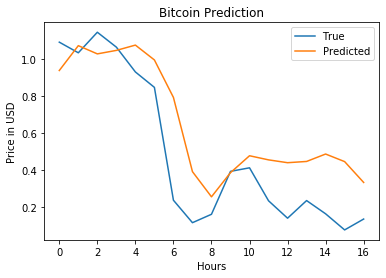

In [58]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X3.values, y3.values, shuffle=False, test_size=0.2)

reg = RandomForestRegressor(n_estimators=250, max_depth=100, random_state=28)
reg.fit(X_train2, y_train2)
y_pred = reg.predict(X_test2)
print('MSE:', mean_squared_error(y_test2, y_pred))
print('MAE:', mean_absolute_error(y_test2, y_pred))

plt.plot(y_test2, label='True')
plt.plot(y_pred, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

In [59]:
y_pred_org = (y_pred * std) + mean
y_test_org = (y_test2 * std) + mean

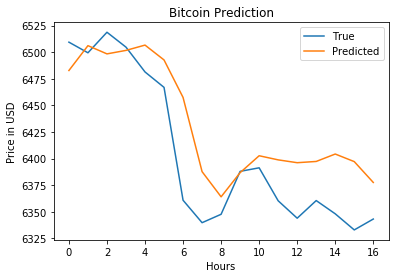

In [60]:
plt.plot(y_test_org, label='True')
plt.plot(y_pred_org, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

In [61]:
print('MSE:', mean_squared_error(y_test_org, y_pred_org))
print('MAE:', mean_absolute_error(y_test_org, y_pred_org))

MSE: 1679.649823341787
MAE: 33.16039907838614


In [62]:
# Applying LSTM
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3.values, y3.values, shuffle=False, test_size=0.2)
X_train3.shape

(65, 4)

In [63]:
X_train3 = X_train3.reshape(X_train3.shape[0], 4 ,1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

model1 = Sequential()
model1.add(LSTM(128, input_shape=(4,1),return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(32, activation='tanh'))
model1.add(Dense(1, activation='linear'))

model1.compile(optimizer="adam", loss="mean_squared_error")

model1.fit(X_train3, y_train3, epochs=50)

# model1.evaluate(X_test3 , y_test3)

Train on 65 samples
Epoch 1/50
65/65 [==============================] - 5s 81ms/sample - loss: 1.1482
Epoch 2/50
65/65 [==============================] - 0s 876us/sample - loss: 1.0821
Epoch 3/50
65/65 [==============================] - 0s 723us/sample - loss: 1.0198
Epoch 4/50
65/65 [==============================] - 0s 815us/sample - loss: 0.9423
Epoch 5/50
65/65 [==============================] - 0s 784us/sample - loss: 0.8564
Epoch 6/50
65/65 [==============================] - 0s 753us/sample - loss: 0.7555
Epoch 7/50
65/65 [==============================] - 0s 615us/sample - loss: 0.6342
Epoch 8/50
65/65 [==============================] - 0s 630us/sample - loss: 0.5278
Epoch 9/50
65/65 [==============================] - 0s 615us/sample - loss: 0.4933
Epoch 10/50
65/65 [==============================] - 0s 692us/sample - loss: 0.4915
Epoch 11/50
65/65 [==============================] - 0s 615us/sample - loss: 0.5063
Epoch 12/50
65/65 [==============================] - 0s 815us/samp

MSE: 0.048861781829839294
MAE: 0.13763048607236542


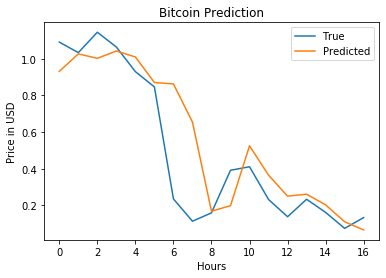

In [64]:
X_test3 = X_test2.reshape(X_test3.shape[0], 4, 1)
y_pred3 = model1.predict(X_test3)
print('MSE:', mean_squared_error(y_test3, y_pred3))
print('MAE:', mean_absolute_error(y_test3, y_pred3))

plt.plot(y_test3, label='True')
plt.plot(y_pred3, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

MSE: 1470.3101839001192
MAE: 23.874497292517738


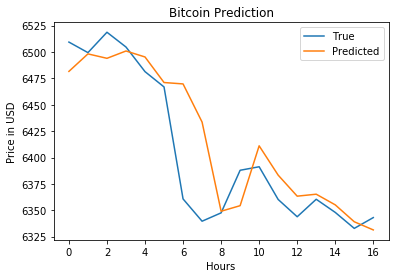

In [65]:
y_pred_org1 = (y_pred3 * std) + mean
y_test_org1 = (y_test3 * std) + mean
print('MSE:', mean_squared_error(y_test_org1, y_pred_org1))
print('MAE:', mean_absolute_error(y_test_org1, y_pred_org1))
plt.plot(y_test_org1, label='True')
plt.plot(y_pred_org1, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

MSE: 0.01957411034206081
MAE: 0.0999789032113582


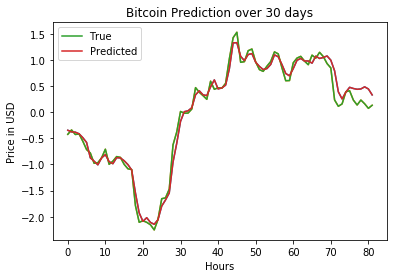

In [66]:
# over the entire 30 days time

pred = reg.predict(X3)
plt.plot(pred)
plt.plot(y3)
print('MSE:', mean_squared_error(y3, pred))
print('MAE:', mean_absolute_error(y3, pred))
plt.plot(y3, label='True')
plt.plot(pred, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction over 30 days')
plt.legend()

MSE: 589.0119479855622
MAE: 17.343206865576697


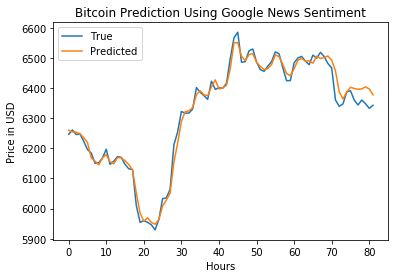

In [67]:
pred_org1 = (pred * std) + mean
y_org1 = (y3 * std) + mean
print('MSE:', mean_squared_error(y_org1, pred_org1))
print('MAE:', mean_absolute_error(y_org1, pred_org1))
plt.plot(y_org1, label='True')
plt.plot(pred_org1, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction Using Google News Sentiment')
plt.legend()

In [68]:
X_new

,Sentence,Date,Hour,sentiment-sentiment_score,price1,label1,volume1,Sentiment,score
0,The Official Pablo Escobar Phone Saga Is Bonkers,2020-03-29,7.0,"{'label': 'NEGATIVE', 'score': 0.9869203}",6267.842442,6247.057869,1.198522e+07,-1,0.9869203
1,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,2020-03-30,10.0,"{'label': 'POSITIVE', 'score': 0.9963661}",6247.057869,6261.529889,5.321685e+06,1,0.9963661
2,Crypto Traders See Bitcoin (But Not Ethereum) ...,2020-03-30,11.0,"{'label': 'POSITIVE', 'score': 0.951648}",6261.529889,6246.503971,4.621280e+06,1,0.951648
3,"'A glimmer of hope': Stocks, oil jump on signs...",2020-03-31,10.0,"{'label': 'POSITIVE', 'score': 0.99856013}",6246.503971,6248.227000,5.201742e+06,1,0.99856013
4,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,2020-03-31,10.0,"{'label': 'NEGATIVE', 'score': 0.9787345}",6248.227000,6224.275820,2.732258e+06,-1,0.9787345
...,...,...,...,...,...,...,...,...,...
77,Typosquatting RubyGems laced with Bitcoin-nabb...,2020-04-21,9.0,"{'label': 'NEGATIVE', 'score': 0.9986516}",6359.996272,6343.719354,7.092367e+06,-1,0.9986516
78,The 2 Things About Marketing That Never Change,2020-04-21,14.0,"{'label': 'NEGATIVE', 'score': 0.9468405}",6343.719354,6360.191122,9.957620e+06,-1,0.9468405
79,Exclusive Interview: NFL Linebacker Russell Ok...,2020-04-21,16.0,"{'label': 'NEGATIVE', 'score': 0.9721771}",6360.191122,6347.819906,5.979936e+06,-1,0.9721771
80,Billionaire Mark Cuban Reveals When He Would B...,2020-04-21,23.0,"{'label': 'NEGATIVE', 'score': 0.78104985}",6347.819906,6332.769962,5.735174e+06,-1,0.78104985


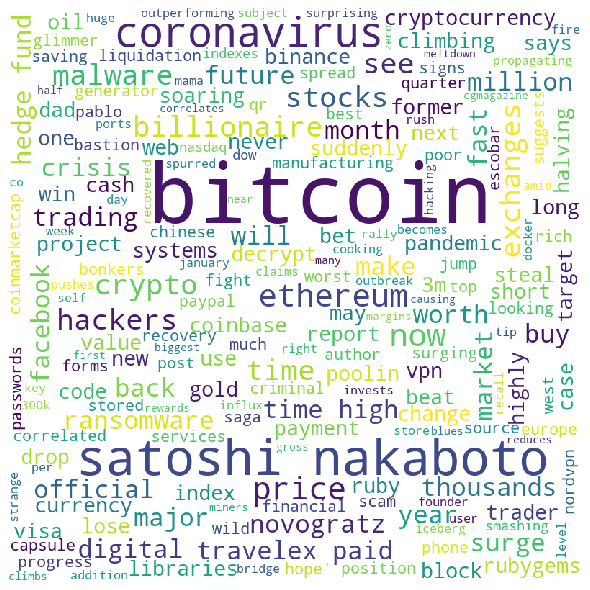

In [69]:
# Reads 'Youtube04-Eminem.csv' file  
df = X_new["Sentence"]
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

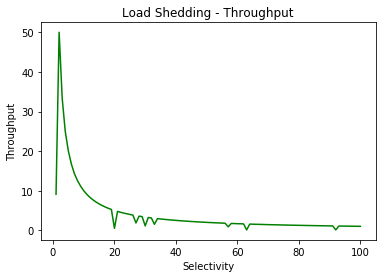

Wall time: 1.46 s


In [70]:
%%time
ip = sc.textFile("X_new.csv") \
#     .map(lambda line: line.split(",")).filter(lambda line :len(line)>3).map(lambda x : (x[0]))

# df1 = pd.DataFrame(ip, columns = ["price"])
# df1.to_csv("df1.csv", index=False)
# df1 = sc.textFile("df1.csv").map(lambda line: line.split(",")).collect()
# # print(df1)
# df1 = pd.DataFrame(df1, columns = ["price"])
# print(df1)

X=[0 for a in range(100)]
Y=[0 for a in range(100)]
i=1

while i<=100:
    s=float(i)   
    a1=datetime.now()
    a_operator = ip.filter(lambda x: x%2 == 1)

    a2=datetime.now()
    #microseconds
    micro1=0.000001*(a2-a1).microseconds
    #seconds
    second1=(a2-a1).seconds  
    #overall time passing A
    cost_a=second1+micro1
    tolerance = 1e-4
    if cost_a > tolerance:
        throughA=1/(cost_a*s)
                
        throughA2=throughA
        X[i-1] = s
        Y[i-1]=throughA2/10
        i=i+1
import matplotlib.pyplot as plt
plt.figure()  
plt.plot(X,Y, 'g')   
plt.xlabel('Selectivity')
plt.ylabel("Throughput")
plt.title('Load Shedding - Throughput')
plt.show()

In [71]:
# Generate Uniform Integer Array of n values
from random import sample
n = 100
s = np.random.randint(100, size = (n, ))
average_array = np.average(s)
# s_1 = sample(pd.Series(s).to_list(),3)
X1=[0 for a in range(100)]
Y1=[0 for a in range(100)]
i = 1
t = 1
u = 1

while i<=100:
    u=float(i) 
    s_1 = sample(pd.Series(s).to_list(),t)
    print(s_1)
    average1 = np.average(s_1)
    accuracy_100 = (average1-average_array)/average_array
    accuracy1 = abs(accuracy_100)
    print(1-accuracy1)
    X1[i-1] = u
    Y1[i-1]=(1-accuracy1) * 100
    t=t+1
    i=i+1

[27]
0.52734375
[28, 0]
0.2734375
[87, 2, 76]
0.92578125
[92, 2, 77, 5]
0.859375
[27, 80, 62, 89, 97]
0.61328125
[29, 49, 71, 68, 76, 97]
0.73046875
[85, 57, 85, 74, 24, 26, 45]
0.8950892857142858
[37, 4, 23, 59, 15, 0, 53, 29]
0.537109375
[18, 94, 88, 29, 97, 62, 53, 45, 87]
0.7565104166666667
[27, 92, 93, 2, 31, 4, 26, 40, 96, 49]
0.8984375
[74, 4, 21, 39, 95, 87, 34, 90, 94, 3, 87]
0.8849431818181819
[24, 54, 28, 36, 44, 4, 5, 89, 74, 57, 99, 17]
0.8642578125
[26, 29, 87, 59, 62, 37, 94, 70, 18, 97, 10, 18, 84]
0.9618389423076924
[31, 97, 74, 0, 87, 74, 99, 34, 84, 29, 80, 52, 4, 81]
0.84765625
[81, 21, 68, 5, 80, 27, 80, 94, 62, 94, 8, 2, 37, 49, 93]
0.9570312500000001
[45, 4, 4, 4, 68, 26, 23, 2, 29, 39, 34, 59, 99, 17, 53, 27]
0.650634765625
[52, 62, 95, 85, 29, 80, 68, 2, 90, 4, 94, 5, 94, 23, 2, 97, 29]
0.9533547794117648
[84, 60, 18, 21, 37, 19, 81, 3, 62, 54, 71, 52, 58, 4, 81, 74, 69, 57]
0.9819878472222222
[58, 57, 39, 60, 59, 21, 99, 92, 81, 40, 18, 84, 53, 2, 45, 26, 15, 

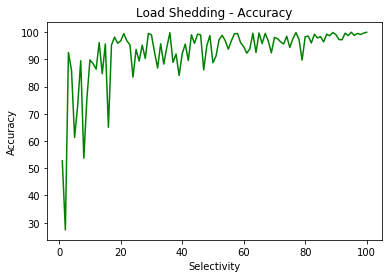

In [72]:
plt.figure()  
plt.plot(X1,Y1, 'g')   
plt.ylabel('Accuracy')
plt.xlabel('Selectivity')
plt.title('Load Shedding - Accuracy')
#plt.axis([0, 1, 0, 1])
plt.show()

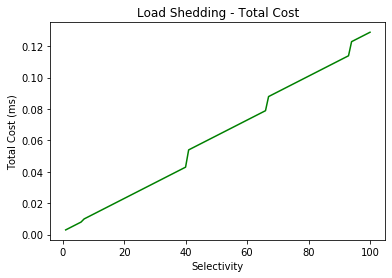

In [73]:
X=[0 for a in range(100)]
Y=[0 for a in range(100)]
i=1
b = 0
while i<=100:
    s=i   
    a1=datetime.now()
    a_operator = ip.filter(lambda x: x%2 == 1)
    a2=datetime.now()
    #microseconds
    micro1=0.000001*(a2-a1).microseconds
    #seconds
    second1=(a2-a1).seconds  
    #overall time passing A
    cost_a=second1+micro1
    b += cost_a
    tolerance = 1e-4
    if cost_a > tolerance:
        throughA=1/(cost_a*s)
                
        throughA2=throughA
        X[i-1] = s
        Y[i-1]= b
        i=i+1
import matplotlib.pyplot as plt
plt.figure()  
plt.plot(X,Y, 'g')   
plt.xlabel('Selectivity')
plt.ylabel("Total Cost (ms)")
plt.title('Load Shedding - Total Cost')
plt.show()